In [1]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import numpy as np
import matplotlib.pyplot as plt
import uproot
import awkward as ak
import seaborn as sns
import matplotlib as mpl

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

import xgboost as xgb

In [2]:
def read_background_file(root_file_path):
    with uproot.open(root_file_path) as root_file:
        event_tree = root_file["event_tree"]
        hit_tree = root_file["hit_tree"]
        photons_tree = root_file["arrival_photons_tree"]

        total_optical_photons = event_tree["total_optical_photons"].array()
        total_thermal_electrons = event_tree["total_thermal_electrons"].array()

        hit_times = hit_tree["hit_times"].array()
        hit_total_energy_deposits = hit_tree["hit_total_energy_deposit"].array()
        hit_energy_deposits = hit_tree["hit_energy_deposits"].array()
        hit_position_x = hit_tree["hit_position_x"].array()
        hit_position_y = hit_tree["hit_position_y"].array()
        hit_position_z = hit_tree["hit_position_z"].array()

        sensor_count = photons_tree["sensor_count"].array()

        return total_optical_photons, total_thermal_electrons, hit_times, hit_total_energy_deposits, sensor_count, hit_position_x, hit_position_y, hit_position_z, hit_energy_deposits
    
def plot_event_display(data_dict, event_name, event_index):
    mpl.rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
    mpl.rc('text', usetex=True)
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')
    
    photons = data_dict[event_name]['photons'][event_index]
    electrons = data_dict[event_name]['electrons'][event_index]
    times = data_dict[event_name]['times'][event_index]
    energy = data_dict[event_name]['energy_deposits'][event_index]
    x = data_dict[event_name]['x'][event_index]
    y = data_dict[event_name]['y'][event_index]
    z = data_dict[event_name]['z'][event_index]
    
    sc = ax.scatter(x, y, z, c=energy, cmap='inferno', s=energy)
    plt.colorbar(sc, ax=ax, label='Energy')
    
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title(f'Event Display: {event_name}')
    
    plt.tight_layout()
    plt.show()
    

In [3]:
base_path = "/home/lane/Software/src/lumilar/system/data/"

file_names = [
    "marley_B8_CC",
    "marley_B8_ES",
    "marley_HEP_CC",
    "marley_HEP_ES",
]

data_dict = {}

for name in file_names:
    path = f"{base_path}{name}.root"
    data = read_background_file(path)
    
    data_dict[name] = {
        'photons': data[0],
        'electrons': data[1],
        'times': data[2],
        'energy': data[3],
        'sensor_count': data[4],
        'x' : data[5],
        'y' : data[6],
        'z' : data[7],
        'energy_deposits' : data[8]
    }

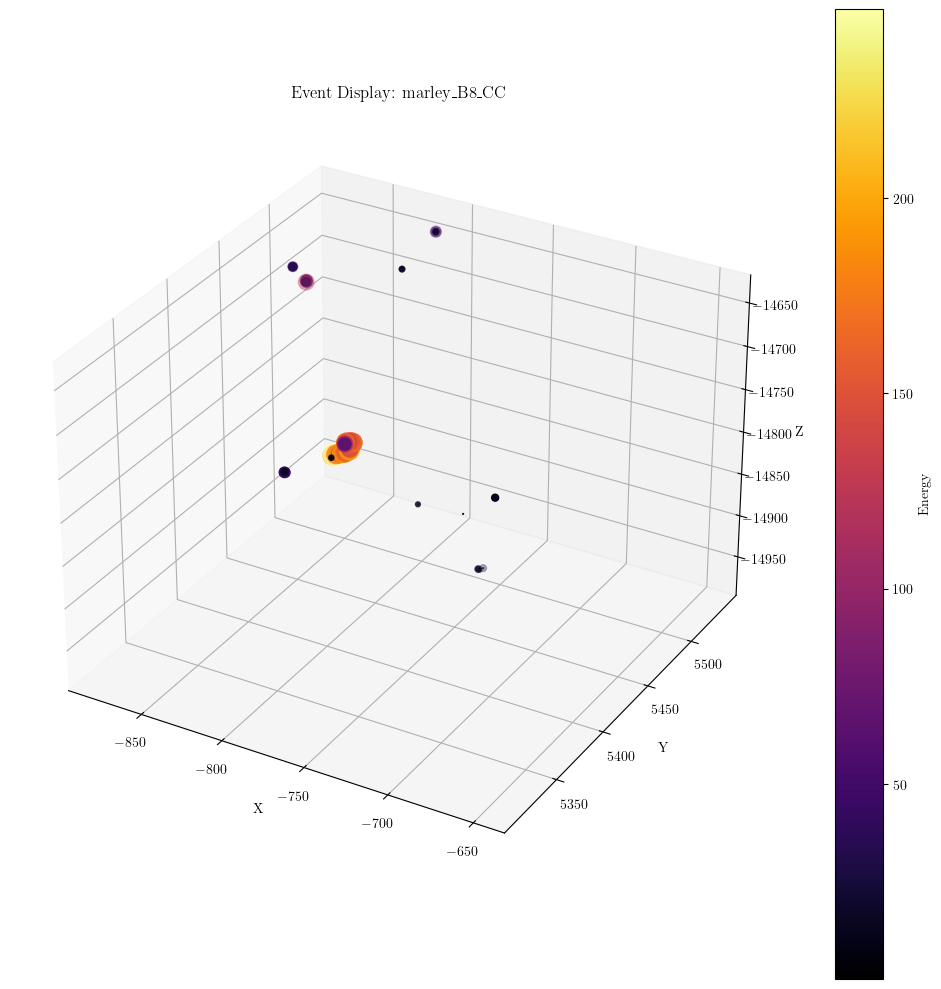

In [4]:
plot_event_display(data_dict, "marley_B8_CC", 2)

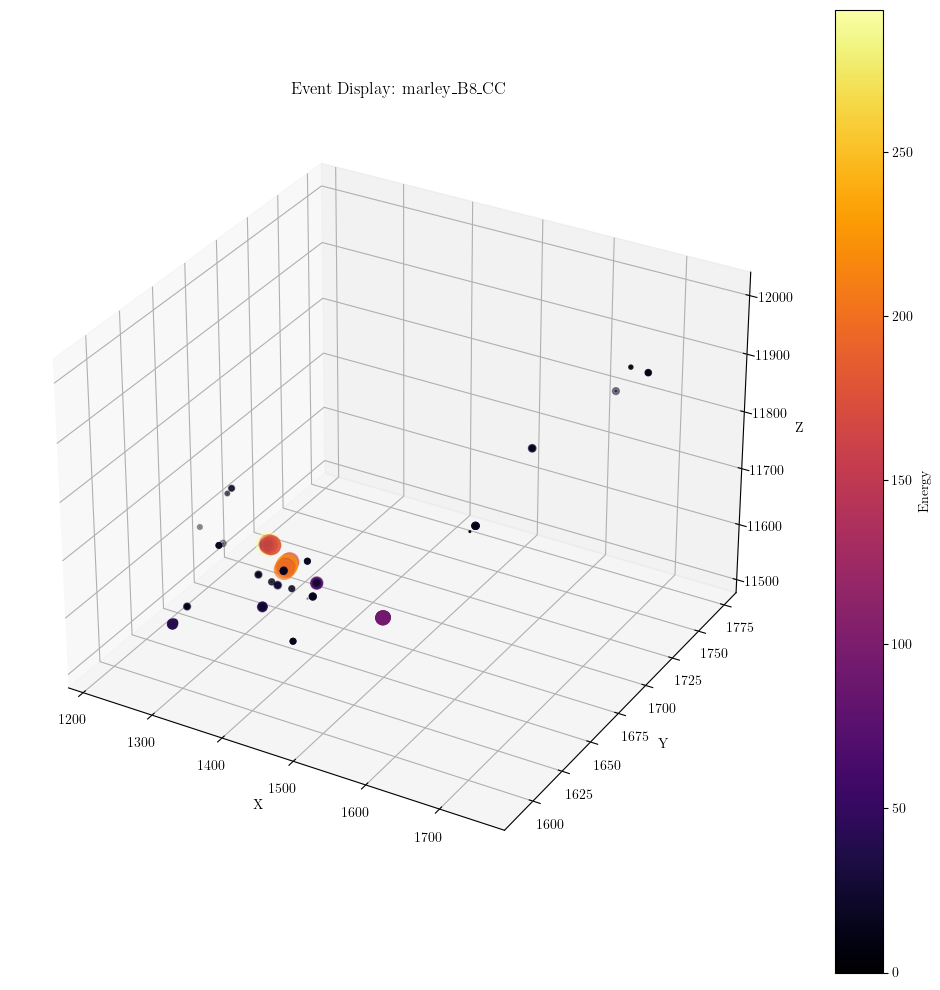

In [5]:
plot_event_display(data_dict, "marley_B8_CC", 3)

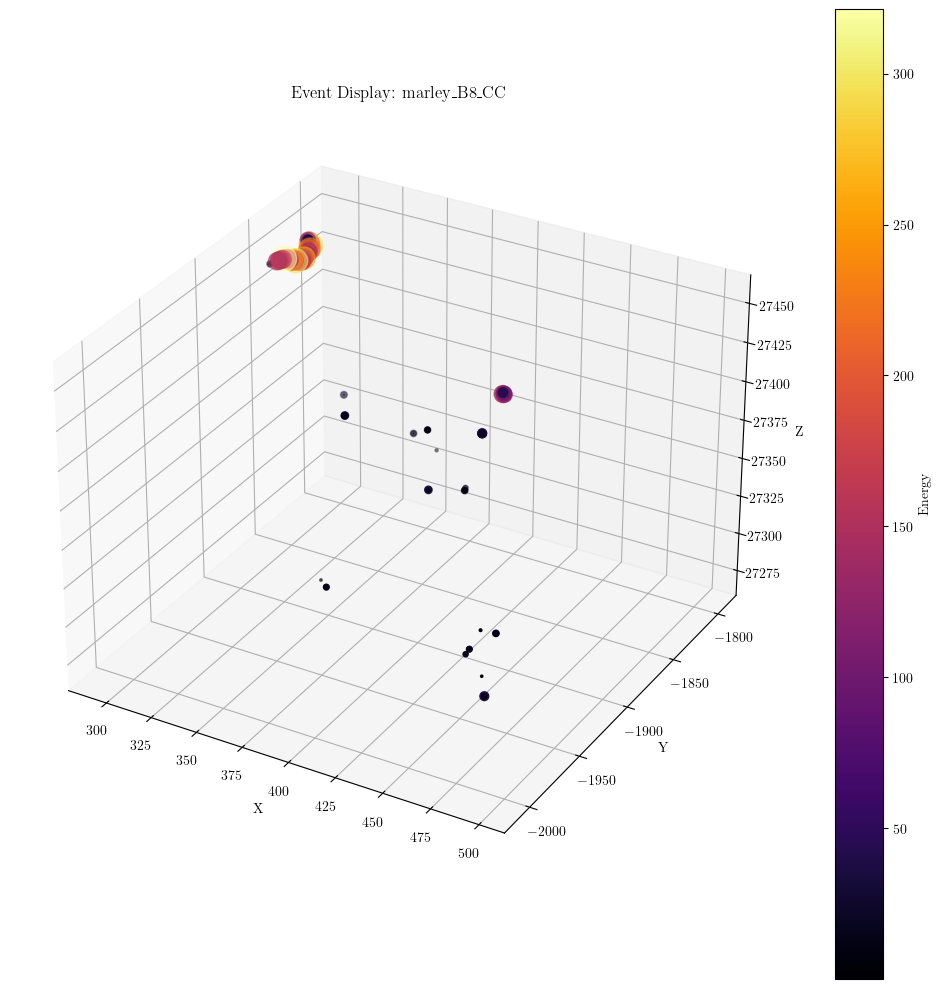

In [6]:
plot_event_display(data_dict, "marley_B8_CC", 4)

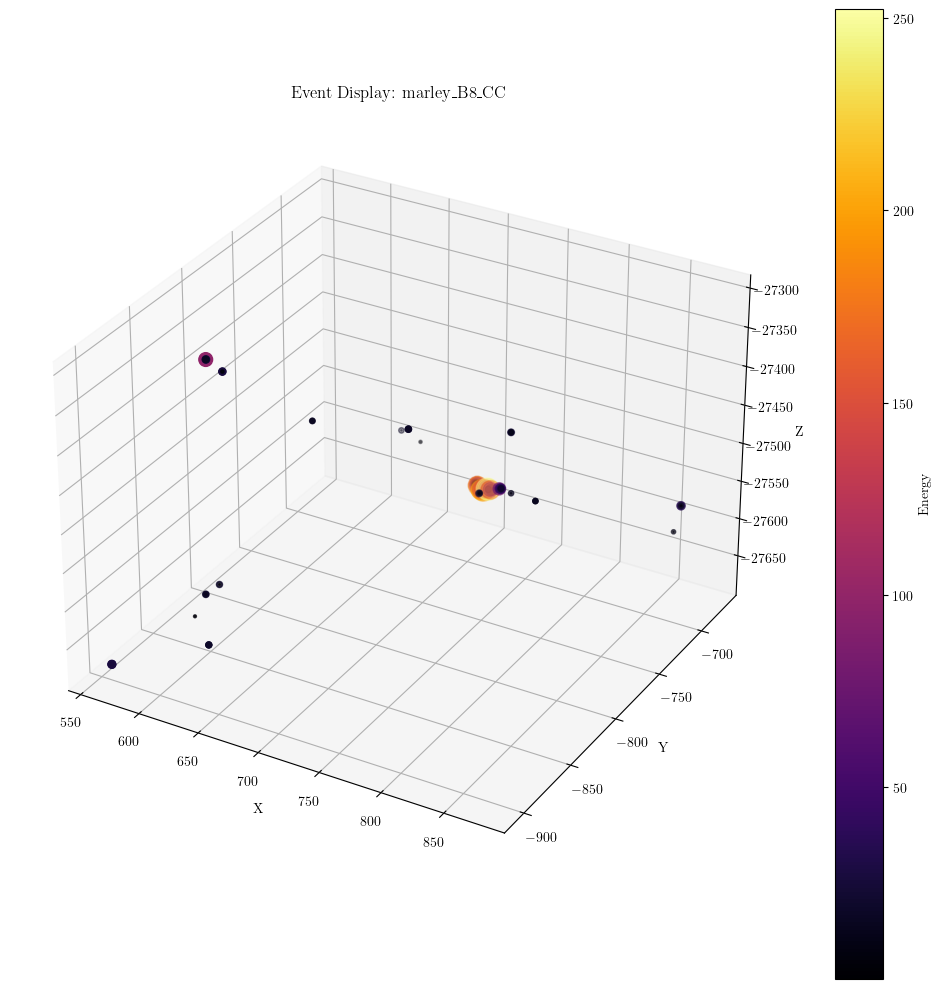

In [7]:
plot_event_display(data_dict, "marley_B8_CC", 5)

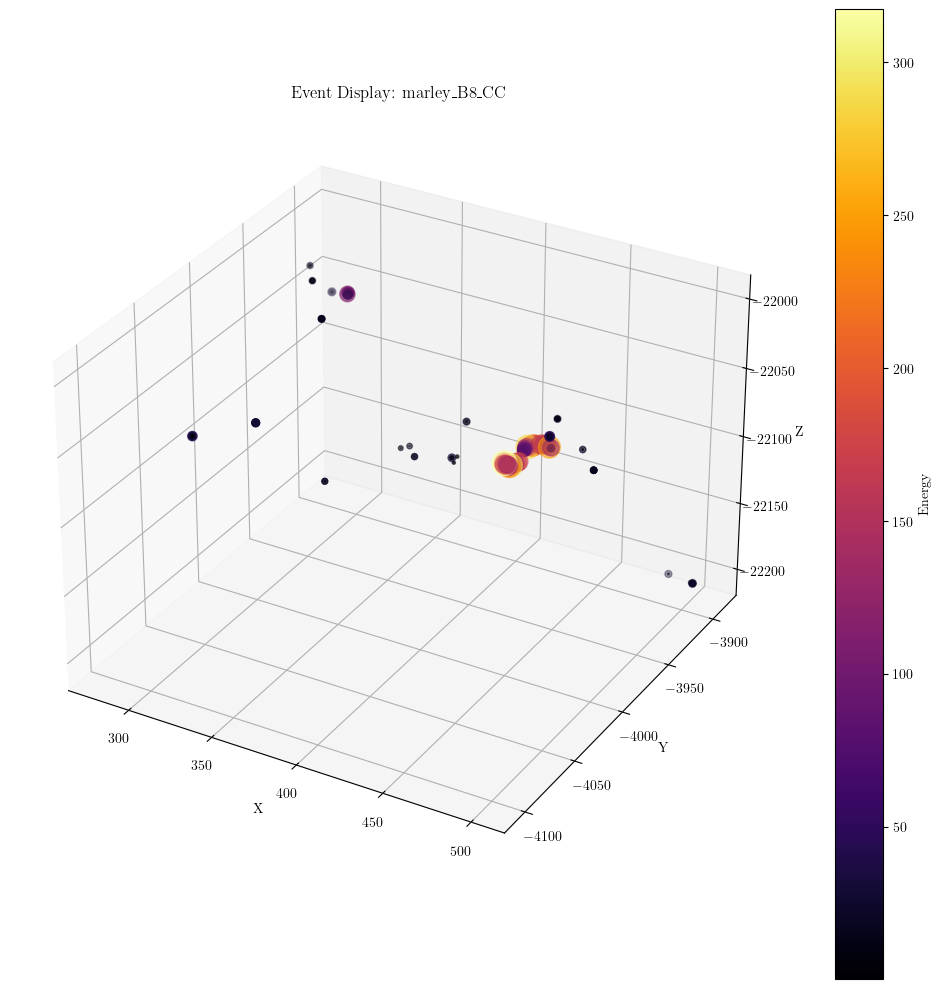

In [8]:
plot_event_display(data_dict, "marley_B8_CC", 6)

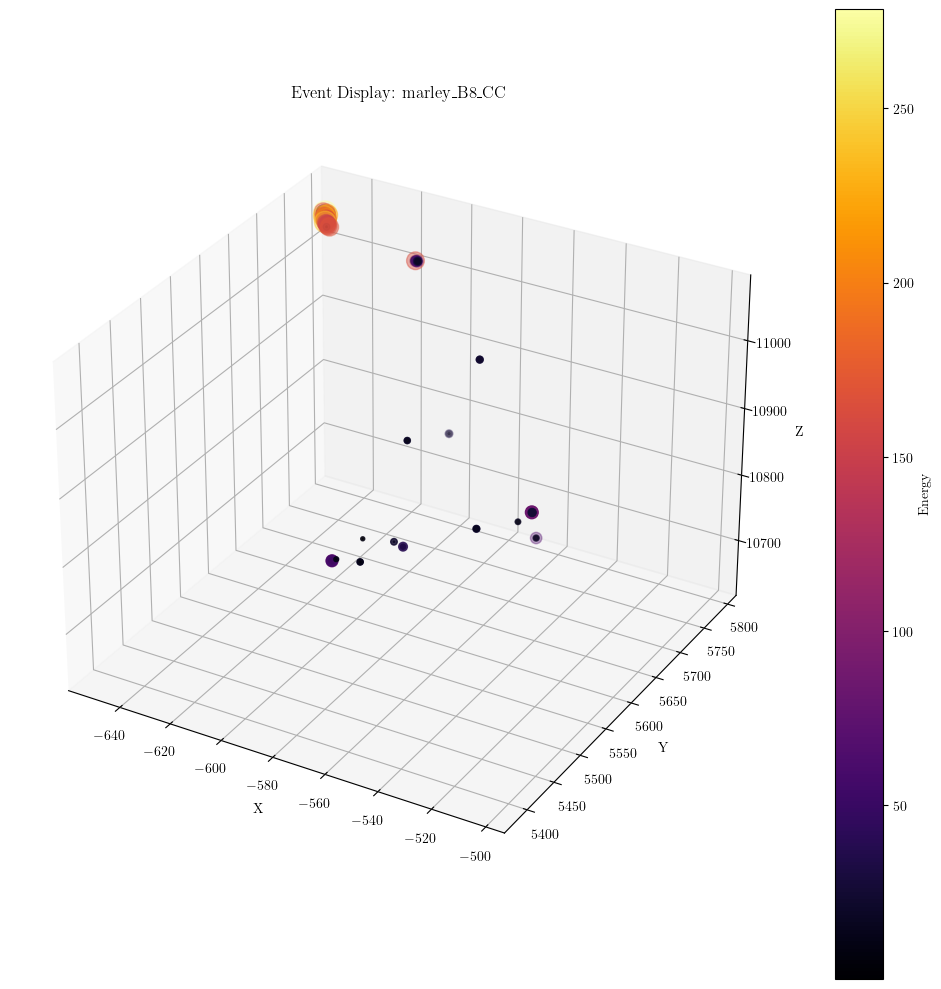

In [9]:
plot_event_display(data_dict, "marley_B8_CC", 7)

In [10]:
def plot_event_display(data_dict, event_name, event_index):
    # Setup for using LaTeX with matplotlib
    mpl.rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
    mpl.rc('text', usetex=True)
    
    # Create a figure and axis for the 2D plot
    fig, ax = plt.subplots(figsize=(10, 10))
    
    # Extract data for the specific event
    photons = data_dict[event_name]['photons'][event_index]
    electrons = data_dict[event_name]['electrons'][event_index]
    times = data_dict[event_name]['times'][event_index]
    energy = data_dict[event_name]['energy_deposits'][event_index]
    x = data_dict[event_name]['x'][event_index]
    y = data_dict[event_name]['y'][event_index]
    z = data_dict[event_name]['z'][event_index]
    
    # Normalize energy for size scaling
    s = (np.array(energy) / np.max(energy)) * 100  # Example scaling factor
    
    # Create the 2D scatter plot on y-z plane
    ax.scatter(y, z, facecolors='none', edgecolors='blue', s=s, marker='s')
    
    ax.set_xlabel('Y')
    ax.set_ylabel('Z')

    ax.tick_params(which='both', direction='in', top=True, right=True, length=4)
    ax.tick_params(which='minor', length=2)
    ax.minorticks_on()

    ax.grid(which='both', linestyle=':', linewidth=0.5, color='gray', alpha=0.5)

    
    plt.tight_layout()
    plt.show()


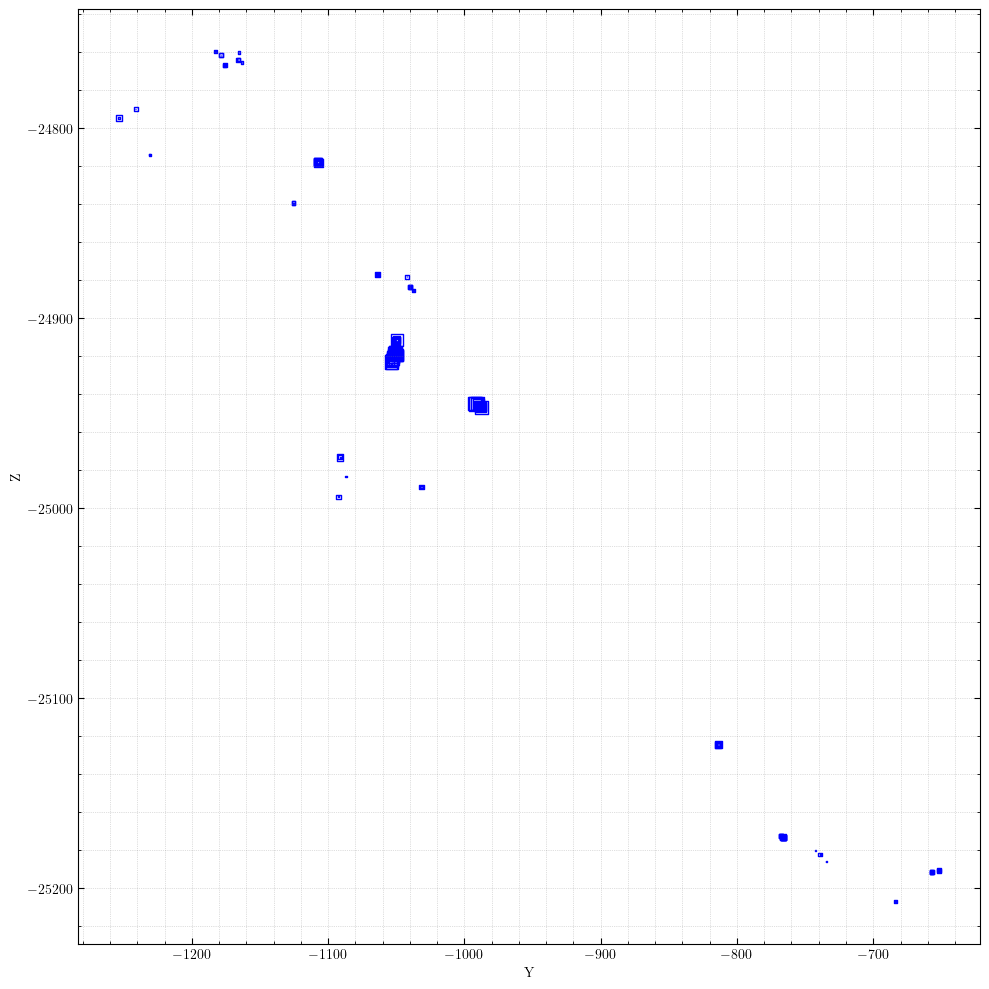

In [11]:
plot_event_display(data_dict, "marley_B8_CC", 9)

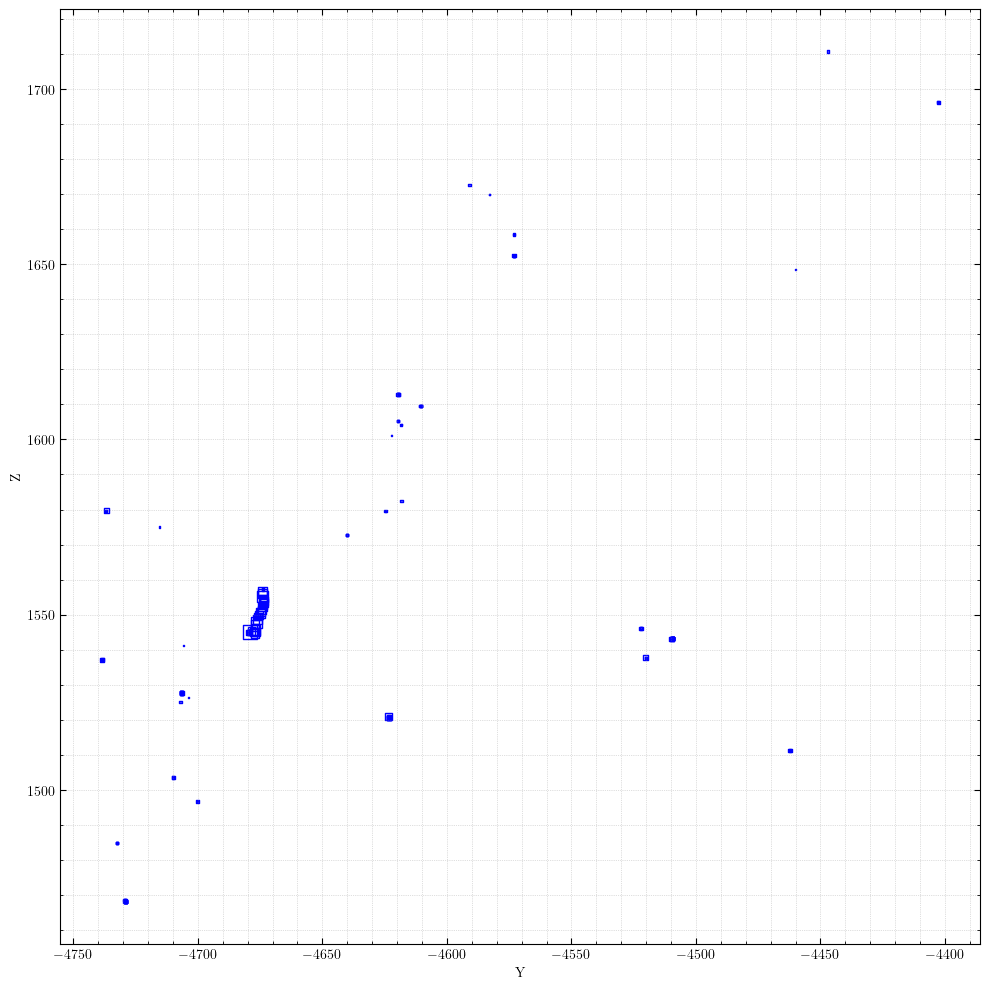

In [12]:
plot_event_display(data_dict, "marley_B8_CC", 10)

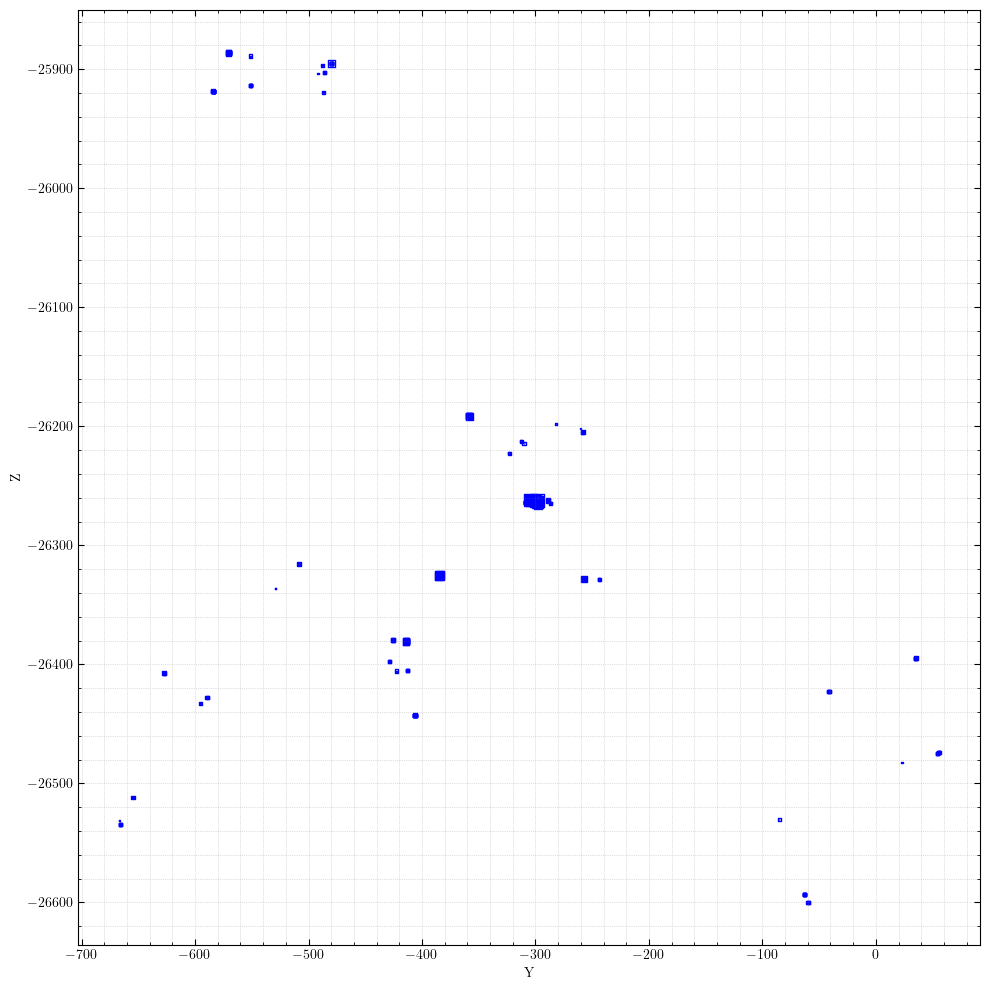

In [13]:
plot_event_display(data_dict, "marley_B8_CC", 11)

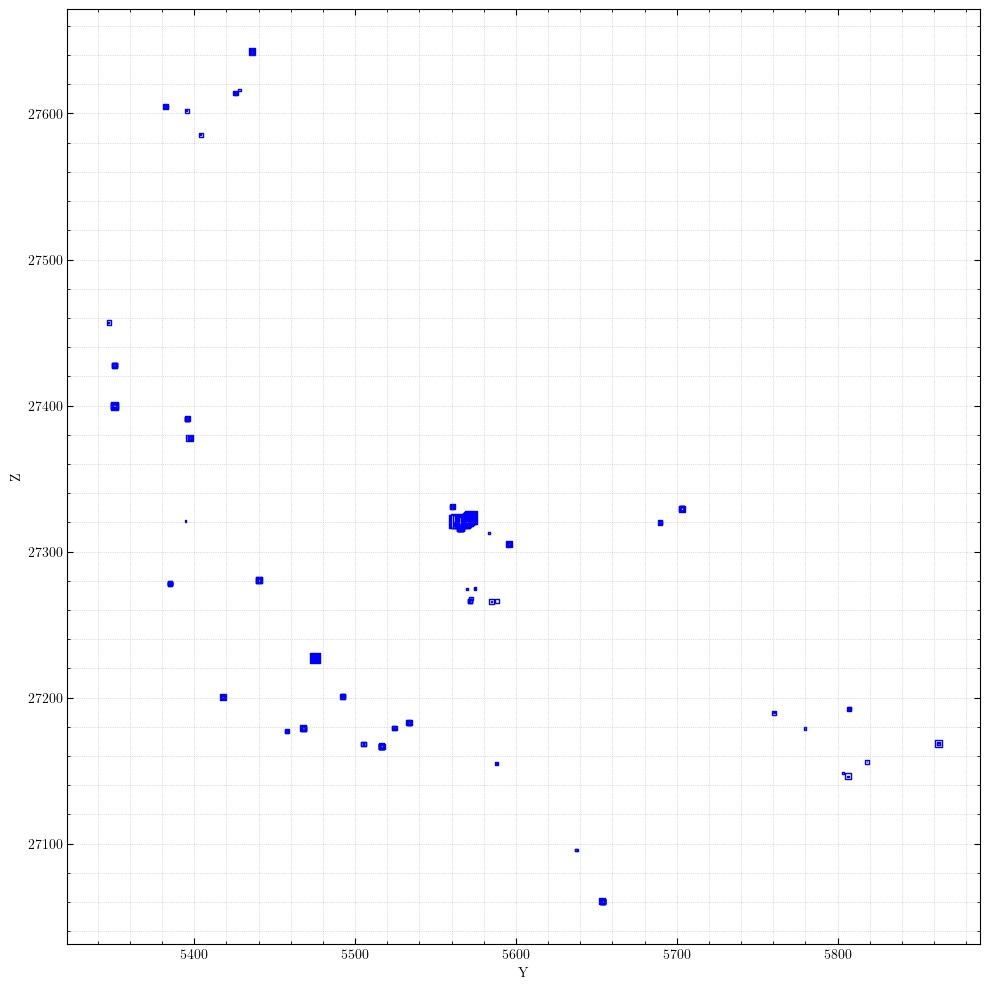

In [14]:
plot_event_display(data_dict, "marley_B8_CC", 12)


In [15]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset

def plot_event_display(data_dict, event_name, event_index):
    mpl.rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
    mpl.rc('text', usetex=True)
    
    fig, ax = plt.subplots(figsize=(10, 10))
    
    # Extract data
    y = np.asarray(data_dict[event_name]['y'][event_index])
    z = np.asarray(data_dict[event_name]['z'][event_index])
    energy = np.asarray(data_dict[event_name]['energy_deposits'][event_index])
    s = (np.array(energy) / np.max(energy)) * 100
    
    # Main plot
    ax.scatter(y, z, facecolors='none', edgecolors='blue', s=s, marker='s')
    ax.set_xlabel('Y-plane [mm]')
    ax.set_ylabel('Z-plane [mm]')
    ax.tick_params(which='both', direction='in', top=True, right=True, length=4)
    ax.tick_params(which='minor', length=2)
    ax.minorticks_on()
    ax.grid(which='both', linestyle=':', linewidth=0.5, color='gray', alpha=0.5)

    # Find densest region in y-z space for the zoom-in
    h, xedges, yedges = np.histogram2d(y, z, bins=38)
    idx = np.unravel_index(h.argmax(), h.shape)
    x_center, y_center = (xedges[idx[0]] + xedges[idx[0] + 1]) / 2, (yedges[idx[1]] + yedges[idx[1] + 1]) / 2
    width = xedges[1] - xedges[0]
    height = yedges[1] - yedges[0]

    in_zoom = (y > x_center - 2*width) & (y < x_center + 2*width) & (z > y_center - 2*height) & (z < y_center + 2*height)
    energy_in_zoom = energy[in_zoom]
    energy_out_zoom = energy[~in_zoom]
    
    # Create histograms
    fig2, ax2 = plt.subplots(1, 2, figsize=(15, 6))
    ax2[0].hist(energy_in_zoom, bins=50, alpha=0.7, label="Inside Zoom")
    ax2[0].set_title("Energy Deposits Inside Zoomed Region")
    ax2[0].set_xlabel("Energy")
    ax2[0].set_ylabel("Counts")

    ax2[1].hist(energy_out_zoom, bins=50, alpha=0.7, label="Outside Zoom", color="red")
    ax2[1].set_title("Energy Deposits Outside Zoomed Region")
    ax2[1].set_xlabel("Energy")
    ax2[1].set_ylabel("Counts")
    
    # Create zoomed-in inset
    axins = inset_axes(ax, width="30%", height="30%", loc="upper right")
    axins.scatter(y, z, facecolors='none', edgecolors='blue', s=s, marker='s')
    axins.set_xlim(x_center - 2*width, x_center + 2*width)
    axins.set_ylim(y_center - 2*height, y_center + 2*height)
    mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec="0.5", linestyle="--")
    
    plt.tight_layout()
    plt.show()

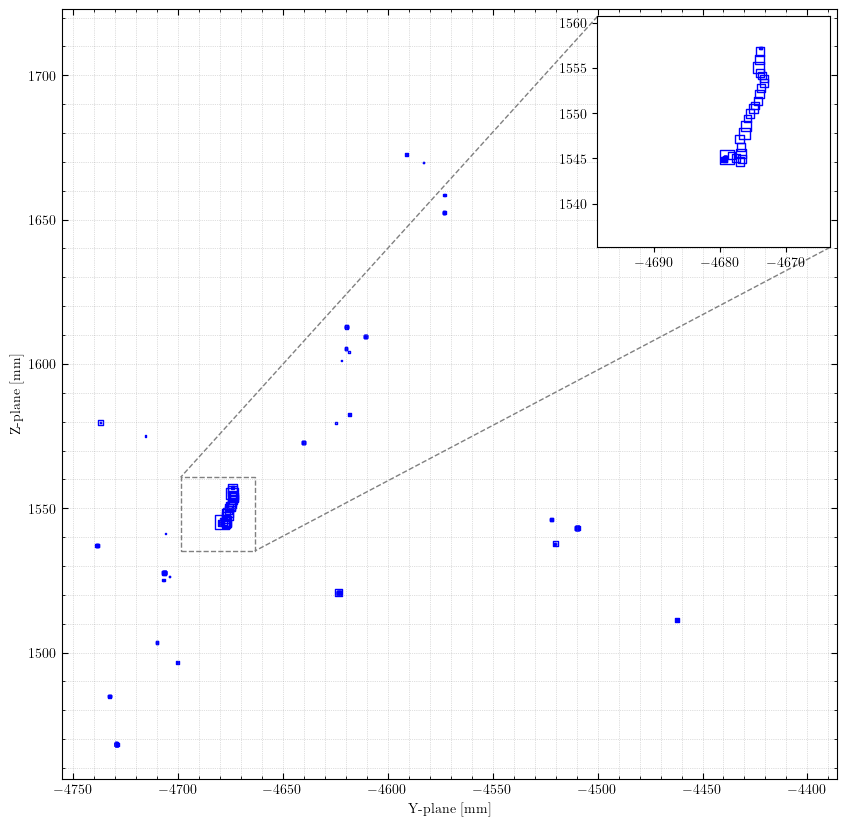

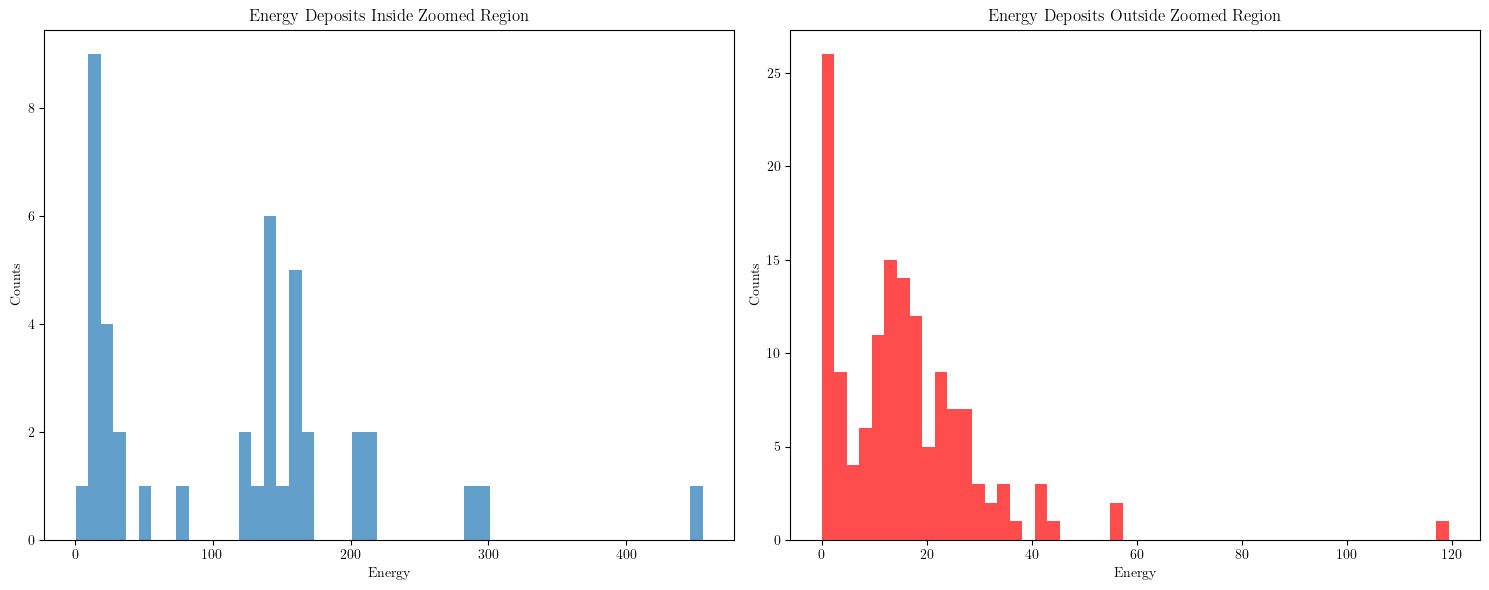

In [16]:
plot_event_display(data_dict, "marley_B8_CC", 10)

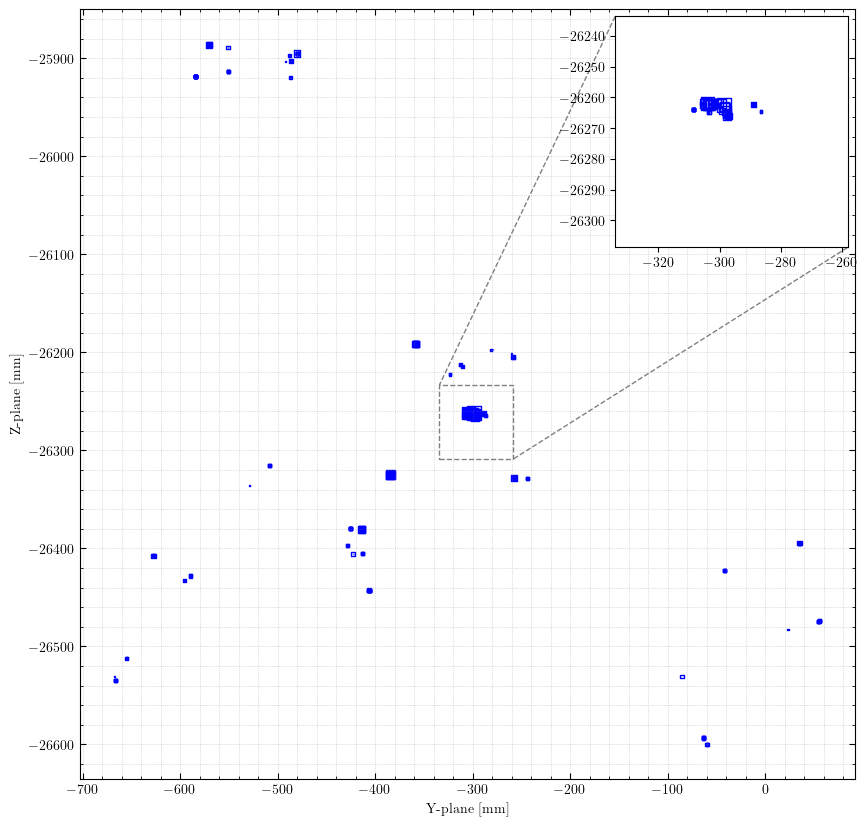

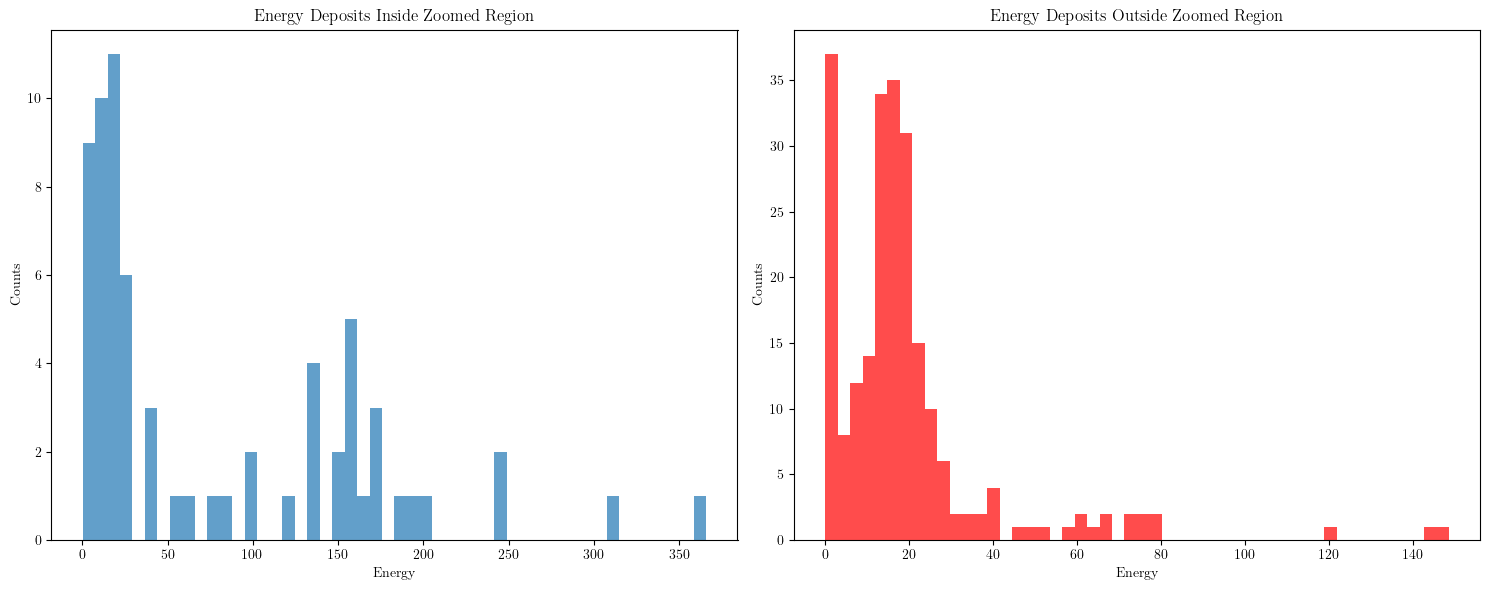

In [17]:
plot_event_display(data_dict, "marley_B8_CC", 11)

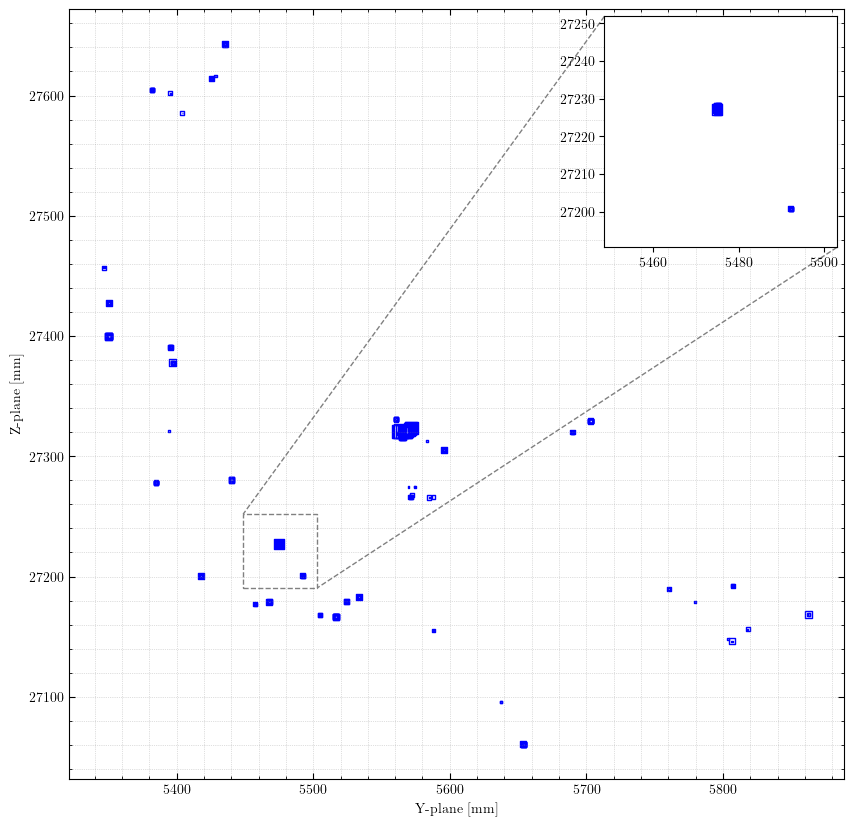

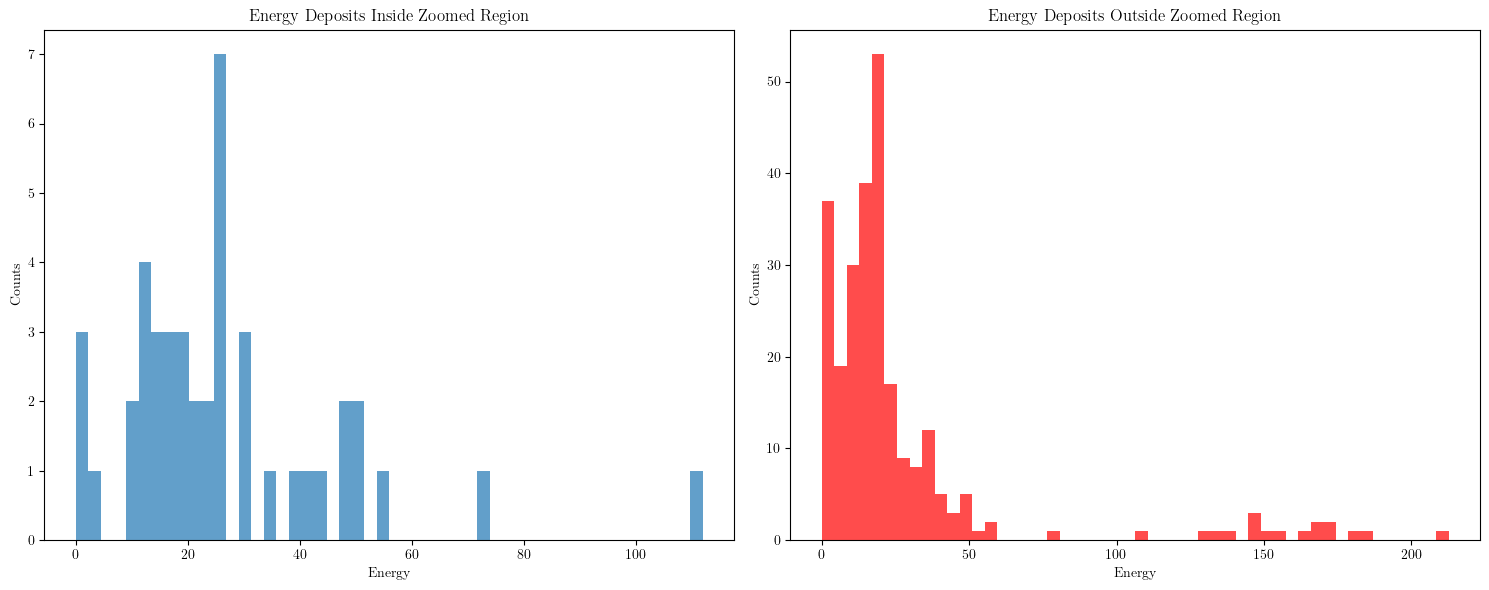

In [18]:
plot_event_display(data_dict, "marley_B8_CC", 12)

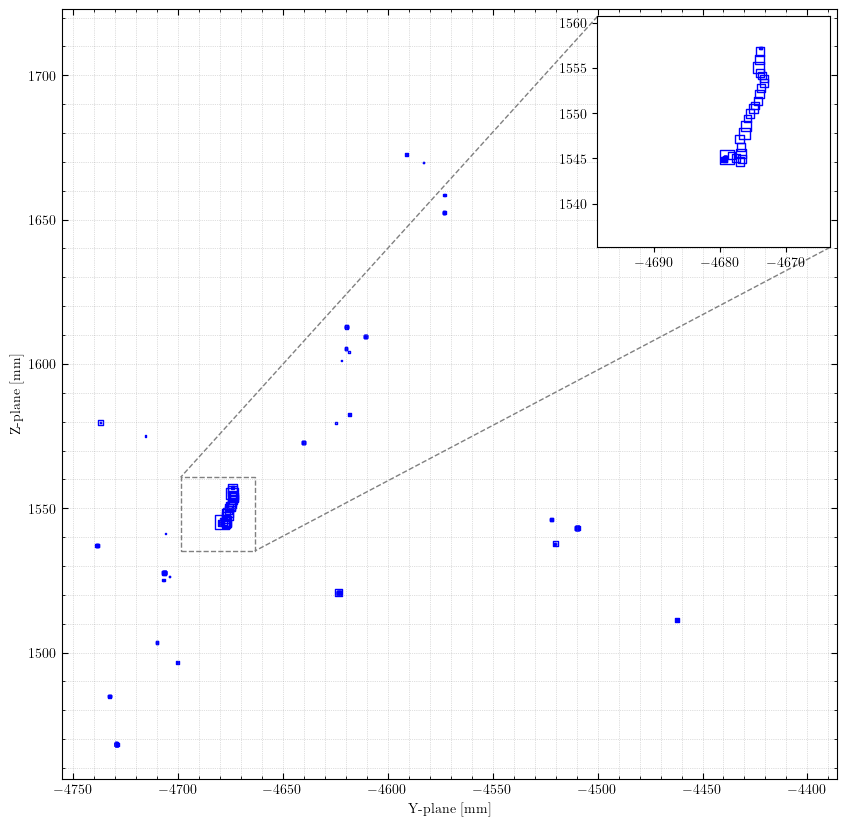

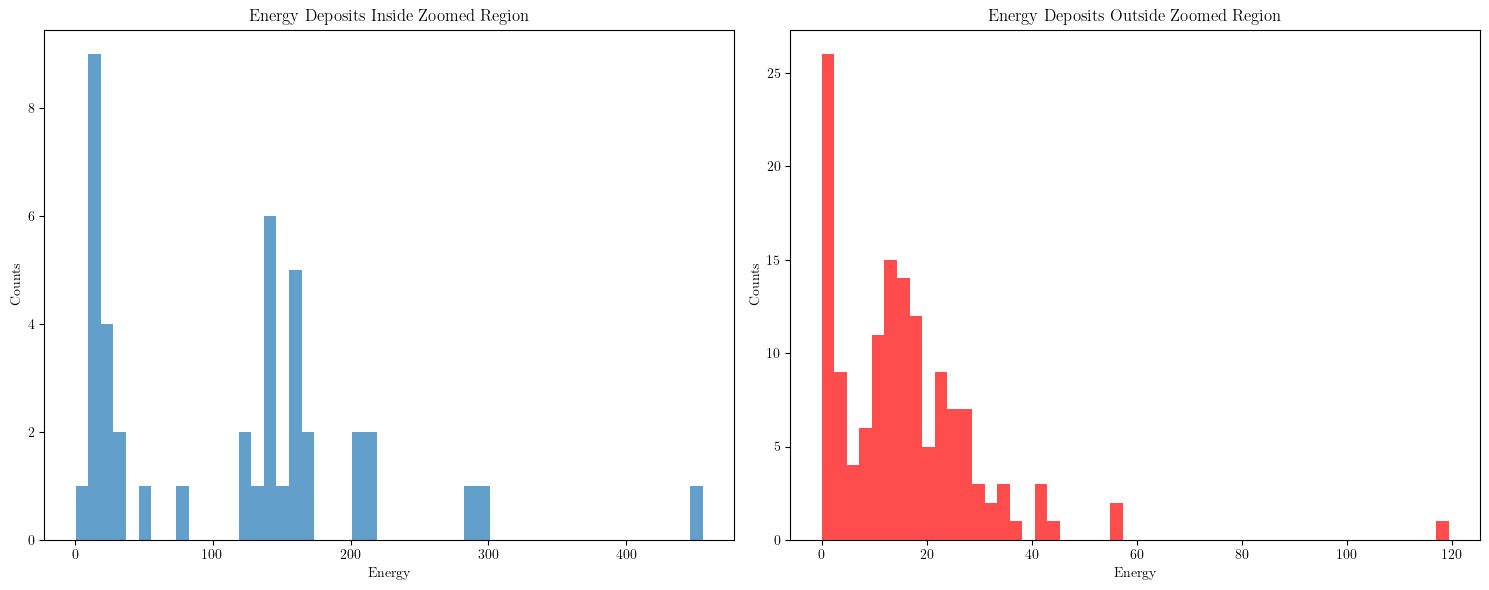

In [19]:
plot_event_display(data_dict, "marley_B8_CC", 10)

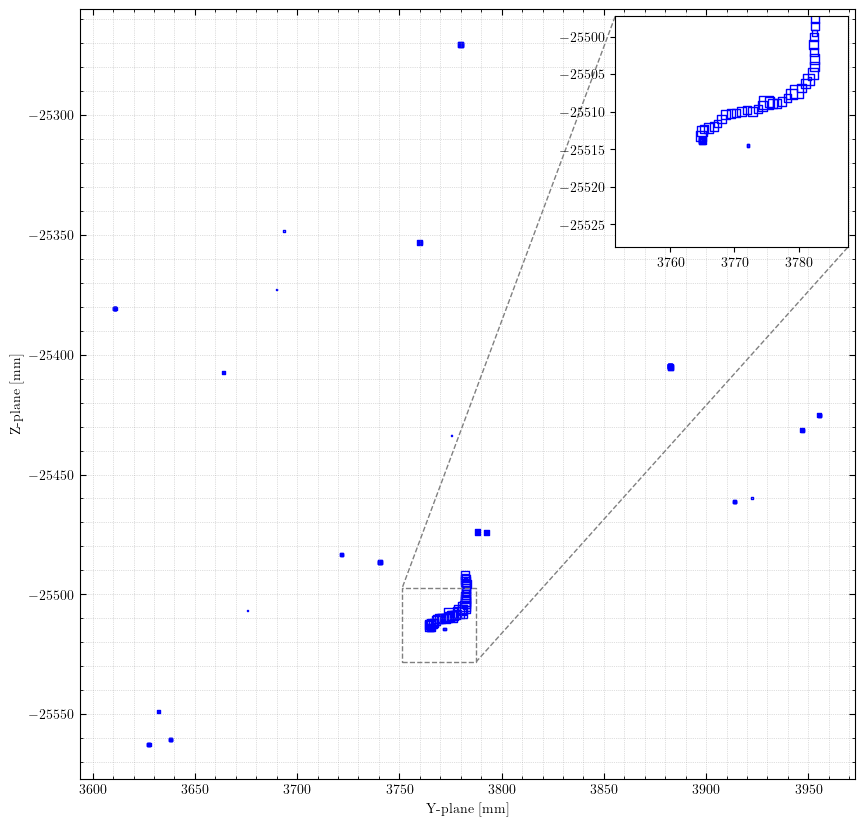

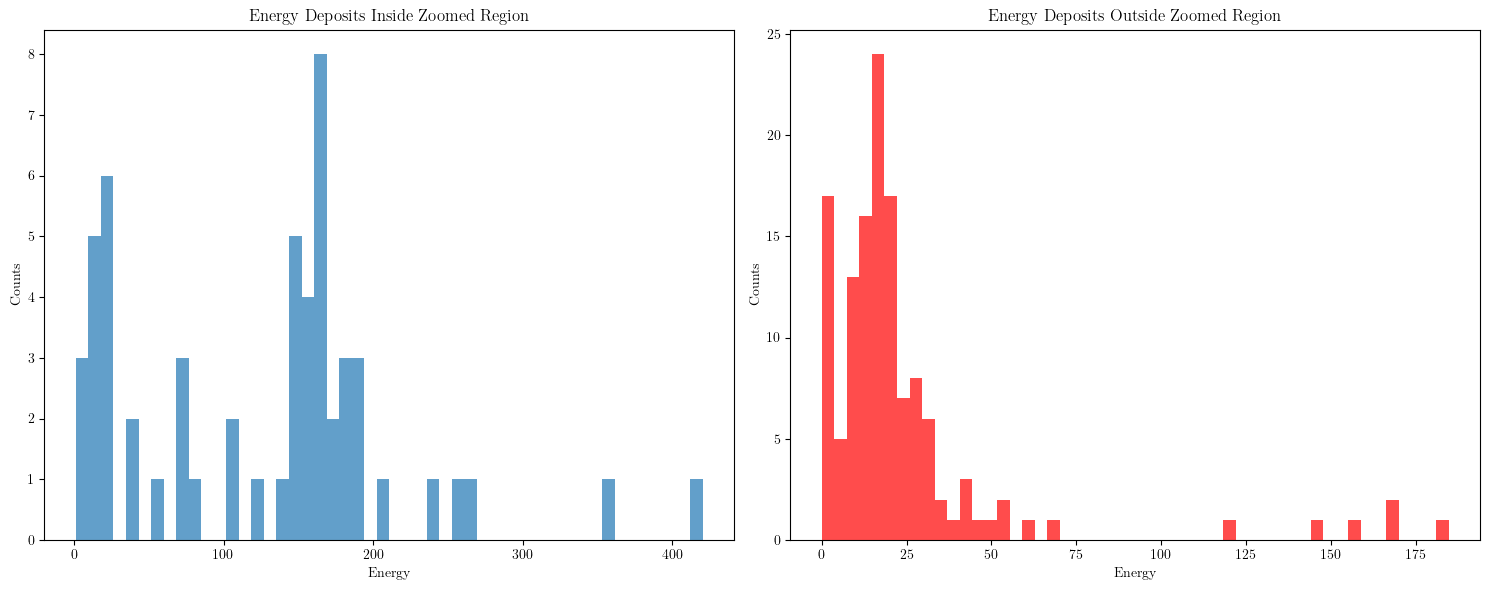

In [20]:
plot_event_display(data_dict, "marley_B8_CC", 23)

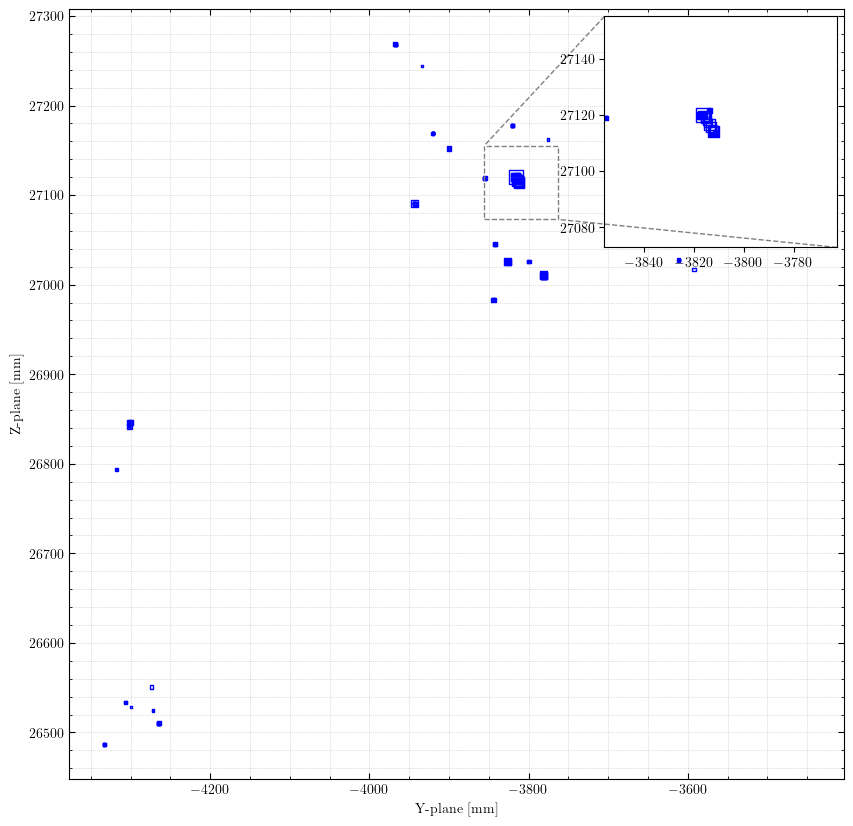

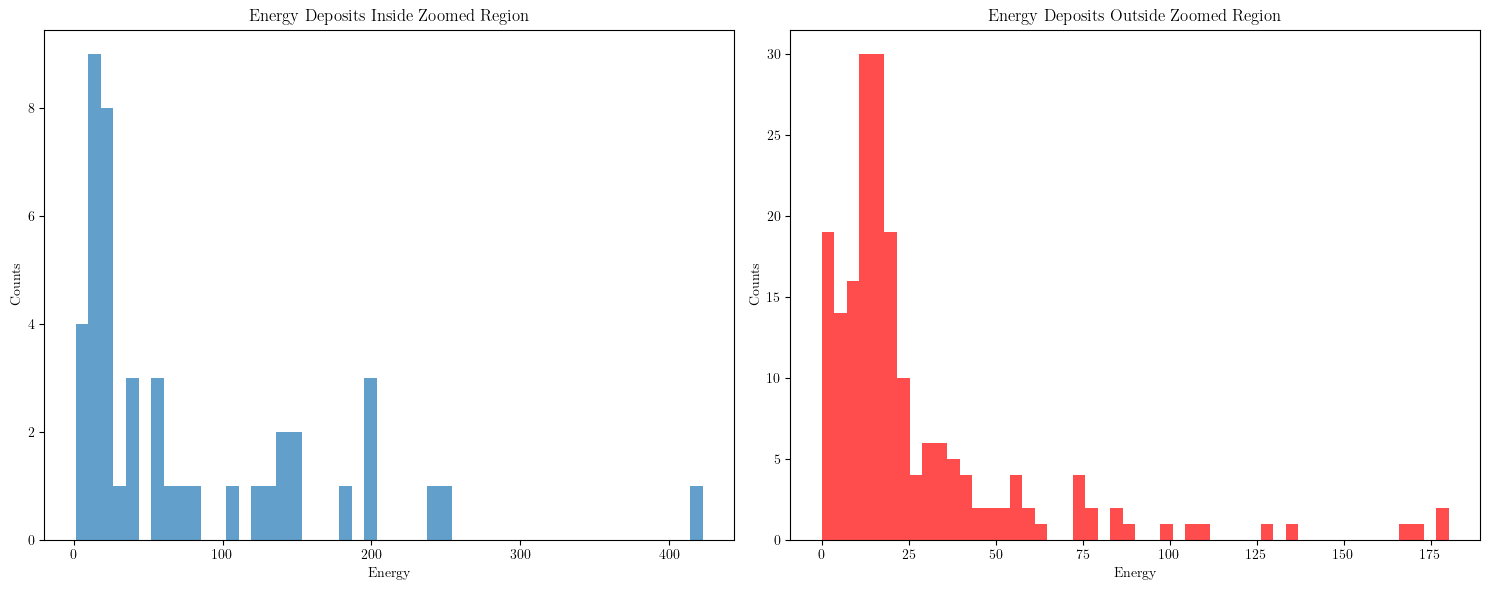

In [21]:
plot_event_display(data_dict, "marley_B8_CC", 22)

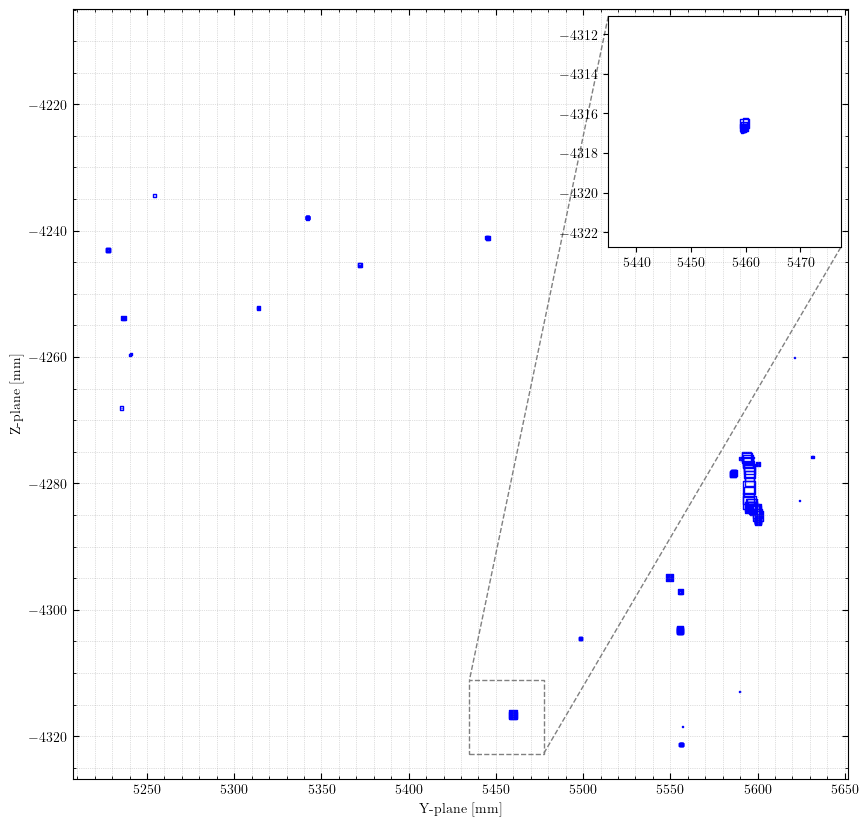

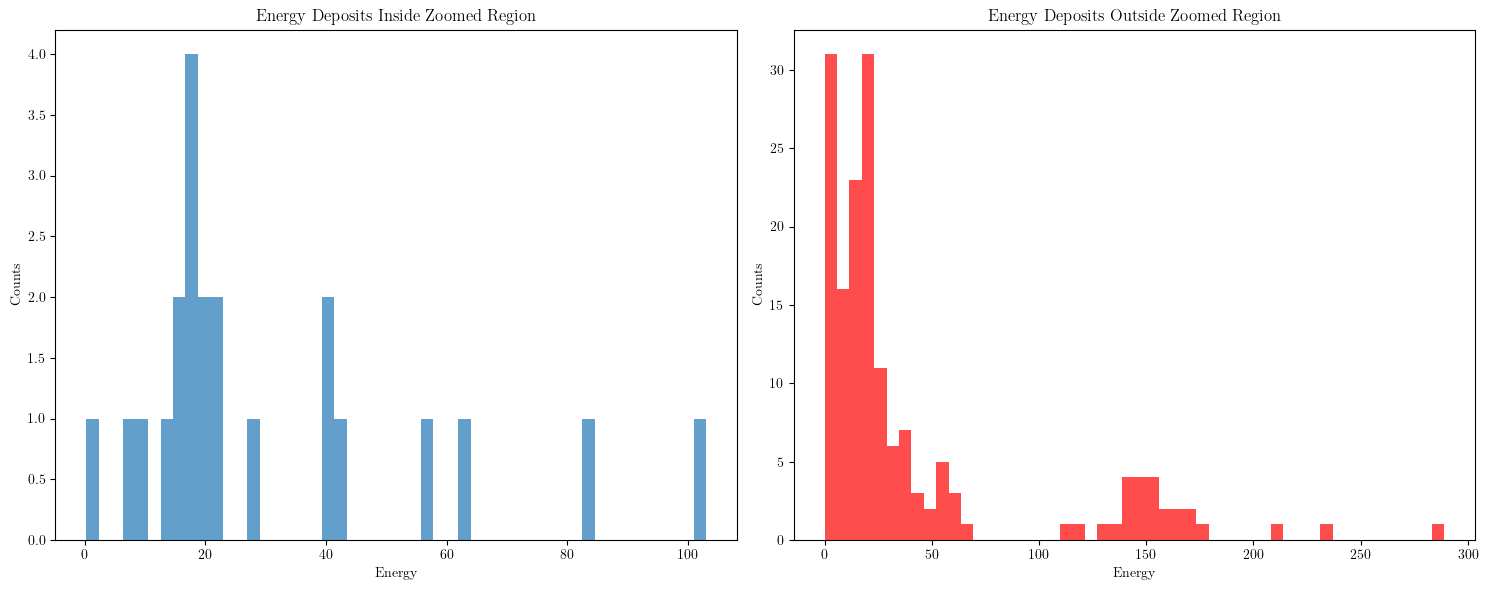

In [22]:
plot_event_display(data_dict, "marley_B8_CC", 30)

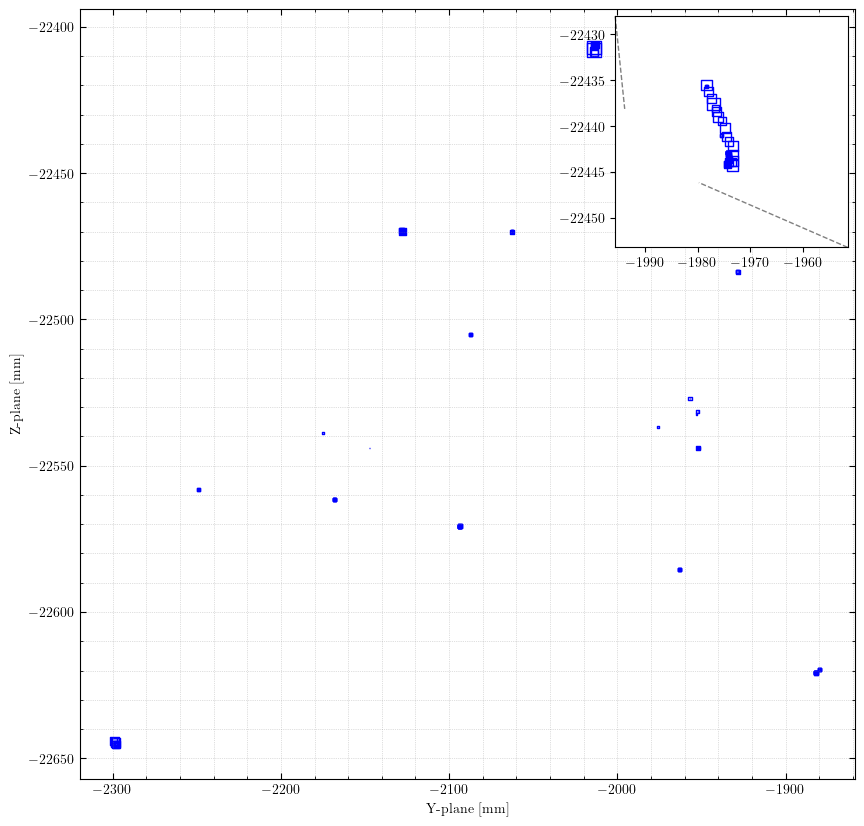

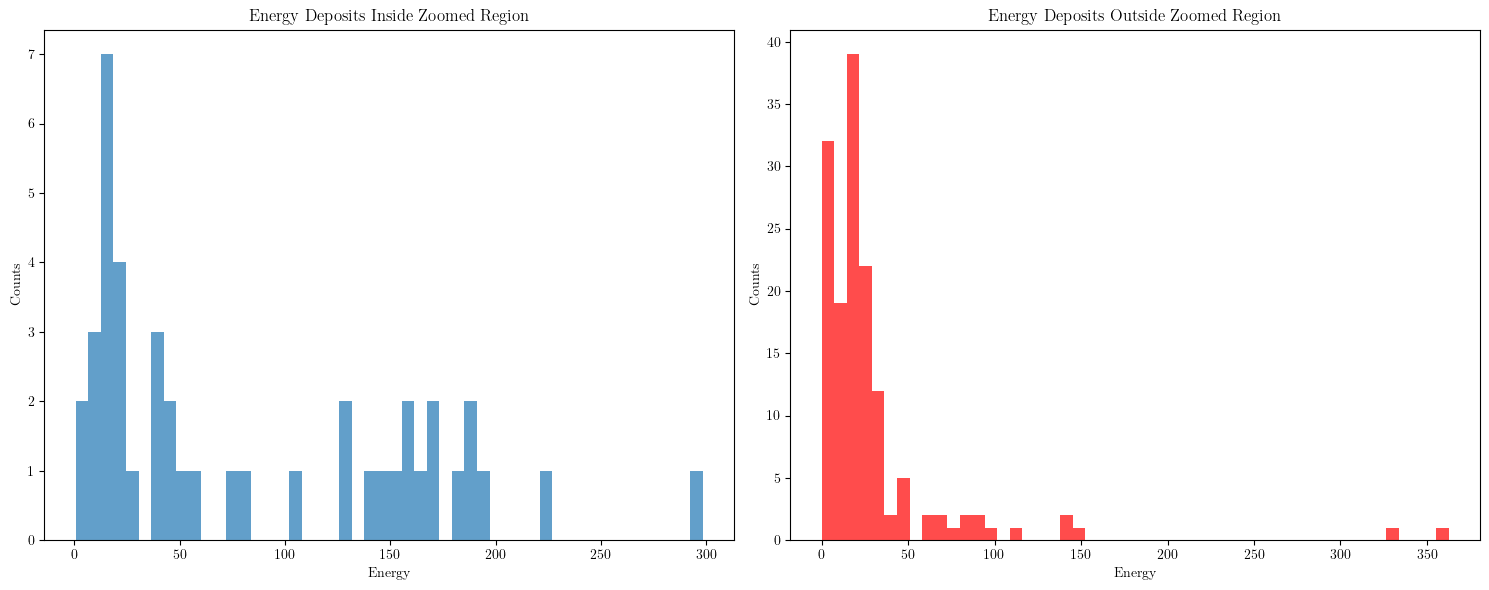

In [23]:
plot_event_display(data_dict, "marley_B8_CC", 40)

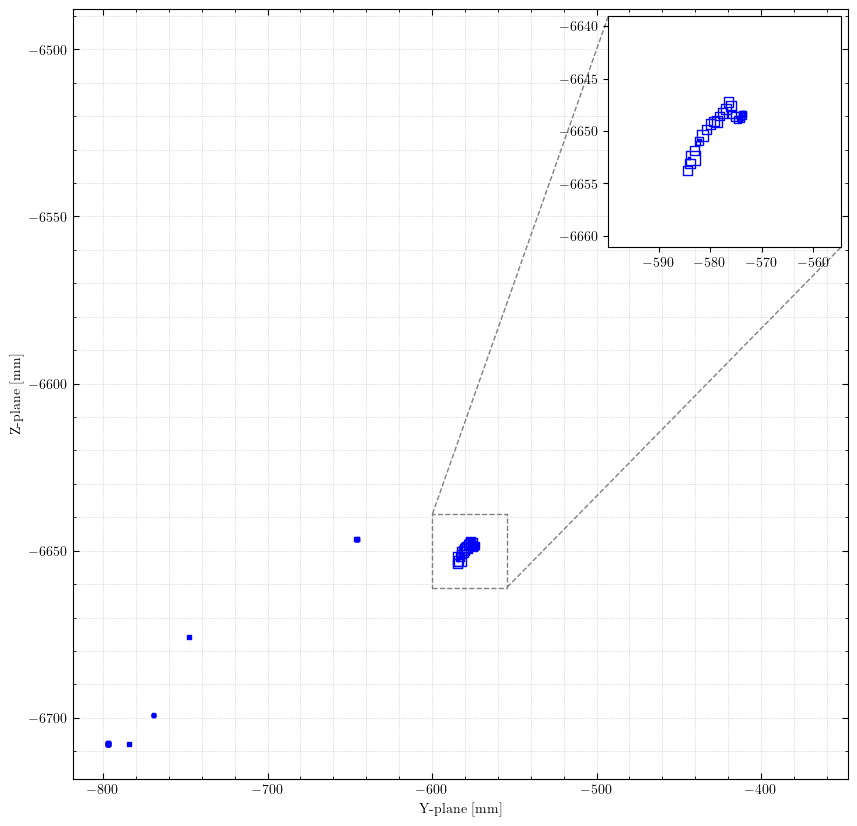

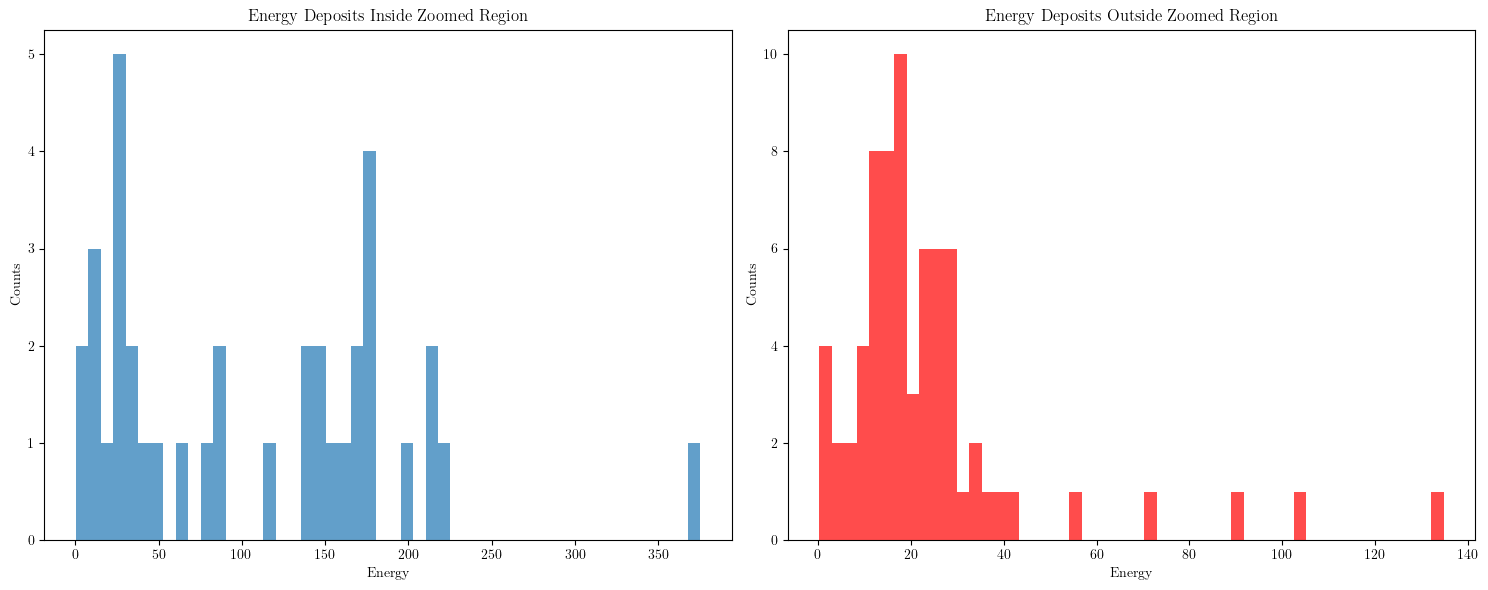

In [24]:
plot_event_display(data_dict, "marley_B8_CC", 50)

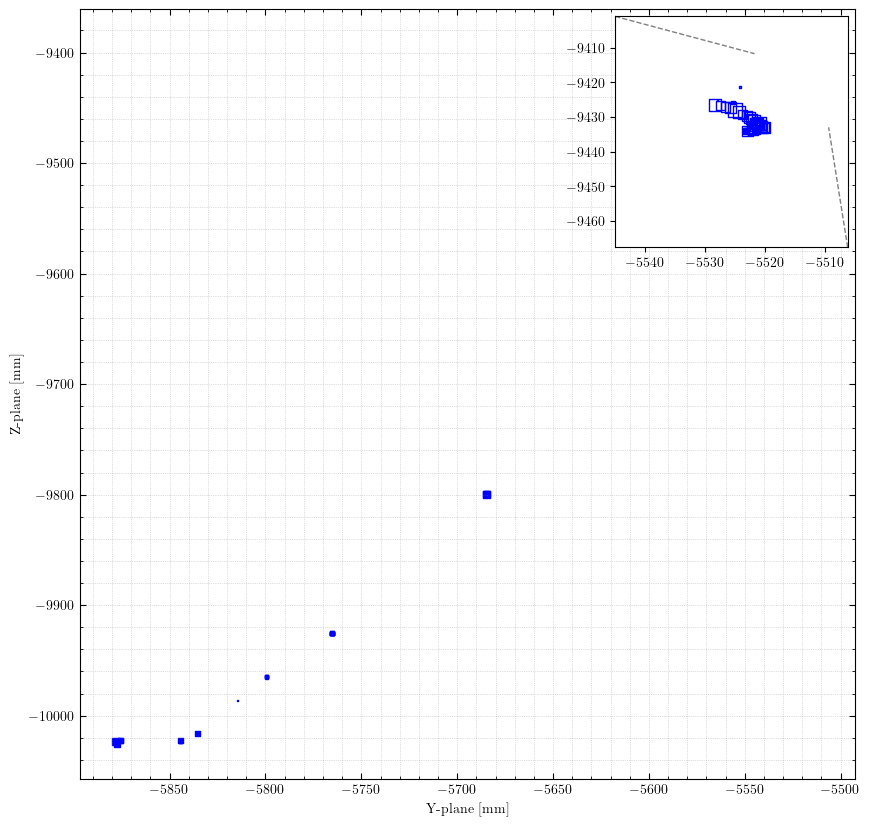

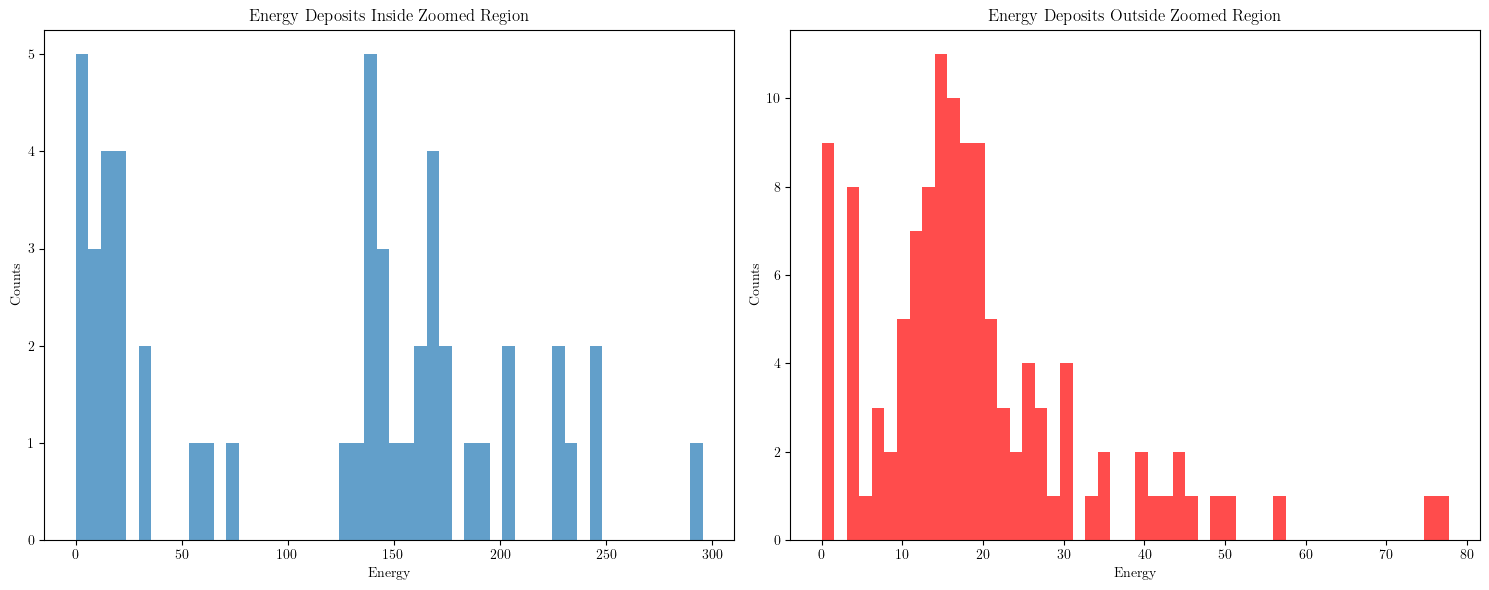

In [25]:
plot_event_display(data_dict, "marley_B8_CC", 60)

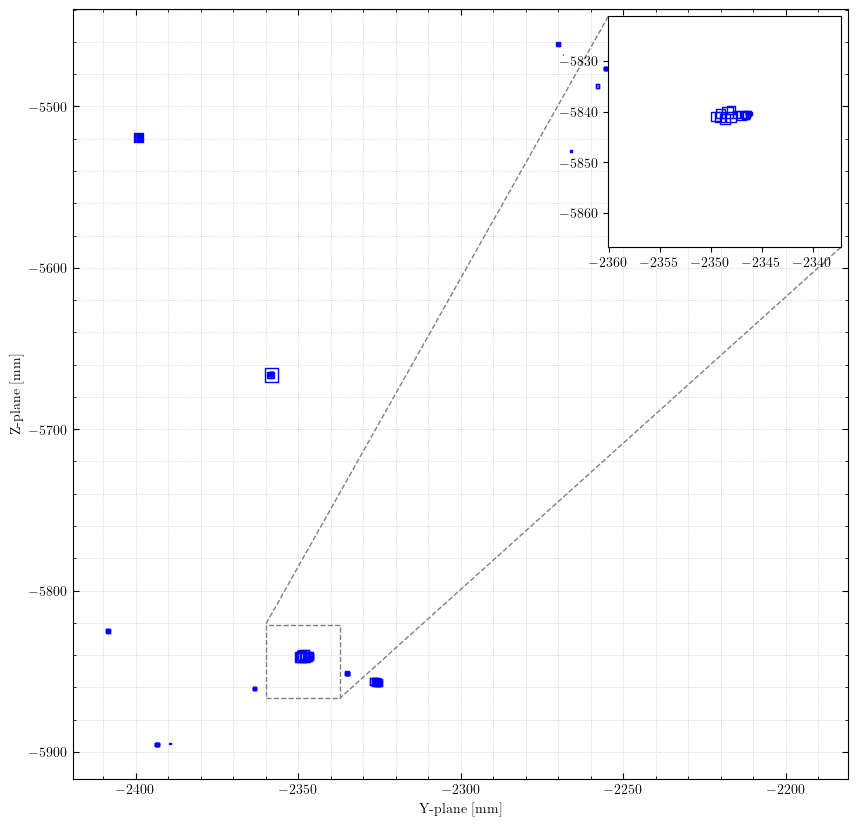

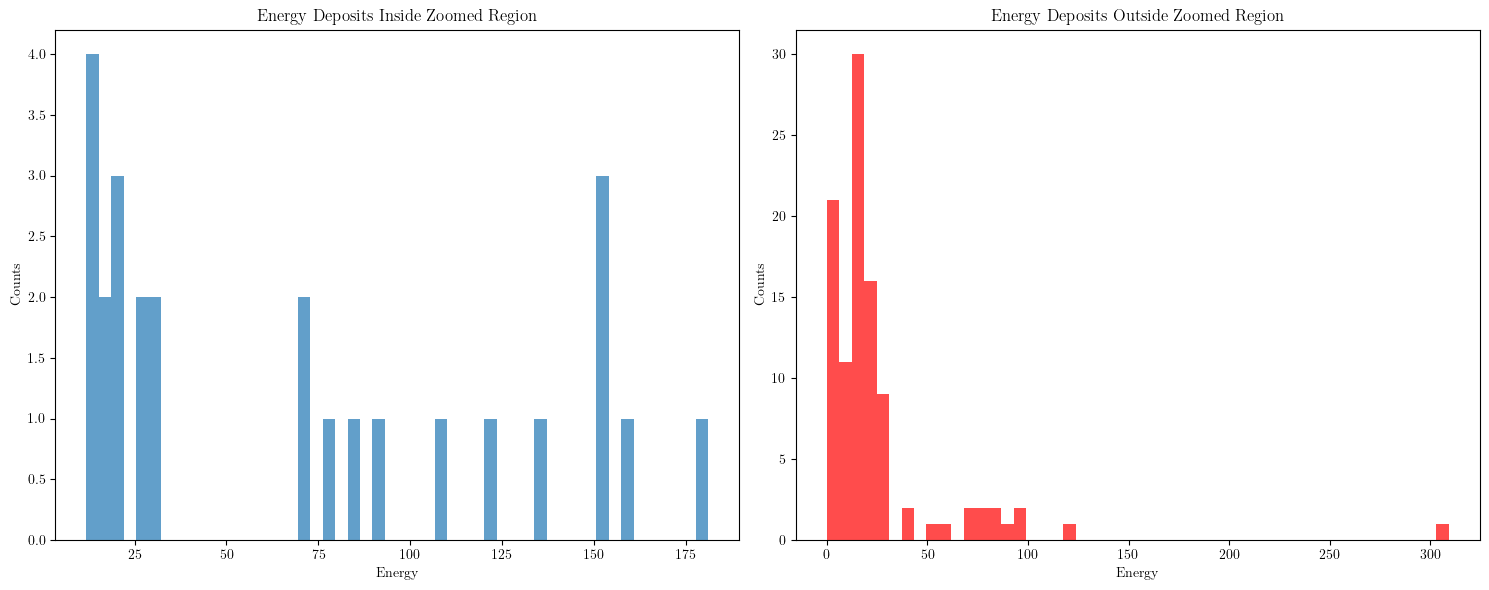

In [26]:
plot_event_display(data_dict, "marley_B8_CC", 100)

In [27]:
plot_event_display(data_dict, "marley_B8_CC", 200)